In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import networkx as nx
import ast
import Influencer_Characteristics as ic
import File_Opening as fo

C:\Users\I6240624\AppData\Local\Temp\ipykernel_1148\113245677.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dfins_en = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Ins_lingua_en_disclosed_ad.csv')
dfins_nl = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Ins_lingua_nl_disclosed_ad.csv')
dftt_en = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\TikTok_lingua_en_disclosed_ad.csv')
dftt_nl = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\TikTok_lingua_nl_disclosed_ad.csv')
dfyt_en = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Youtube_lingua_en_disclosed_ad.csv')
dfyt_nl = fo.read_data(r'C:\Users\I6240624\Documents\BISS\Master Thesis\Data\icwsm_dutch_data\Youtube_lingua_nl_disclosed_ad.csv')

In [3]:
insinf_en = fo.get_unique_values(dfins_en, "username")
insinf_nl = fo.get_unique_values(dfins_nl, "username")
ttinf_en = fo.get_unique_values(dftt_en, "username")
ttinf_nl = fo.get_unique_values(dftt_nl, "username")
ytinf_en = fo.get_unique_values(dfyt_en, "channel_title")
ytinf_nl = fo.get_unique_values(dfyt_nl, "channel_title")

In [4]:
dfyt_en["video_id"].to_csv('dfyt_en_index_ad.csv', index=False)
dfyt_nl["video_id"].to_csv('dfyt_nl_index_ad.csv', index=False)
dftt_en["id"].to_csv('dftt_en_index_ad.csv', index=False)
dftt_nl["id"].to_csv('dftt_nl_index_ad.csv', index=False)
dfins_en["ct_id"].to_csv('dfins_en_index_ad.csv', index=False)
dfins_nl["ct_id"].to_csv('dfins_nl_index_ad.csv', index=False)

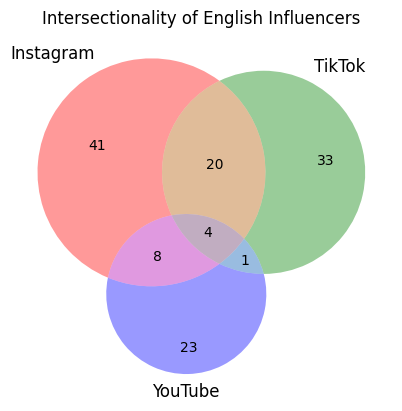

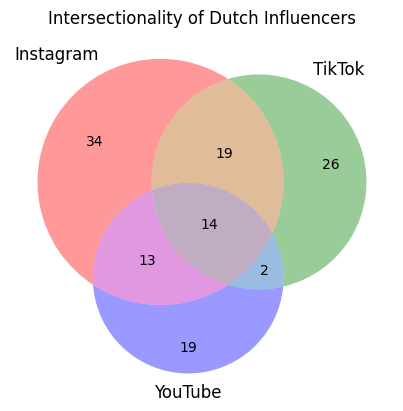

In [5]:
ic.find_common_elements_and_plot(insinf_en, ttinf_en, ytinf_en, "Instagram", "TikTok", "YouTube","Intersectionality of English Influencers")
ic.find_common_elements_and_plot(insinf_nl, ttinf_nl, ytinf_nl, "Instagram", "TikTok", "YouTube","Intersectionality of Dutch Influencers")

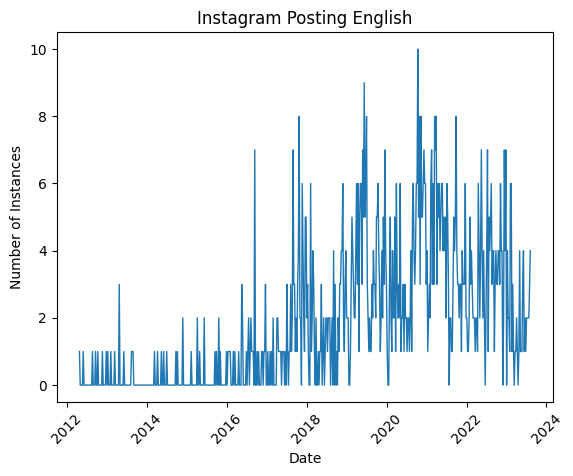

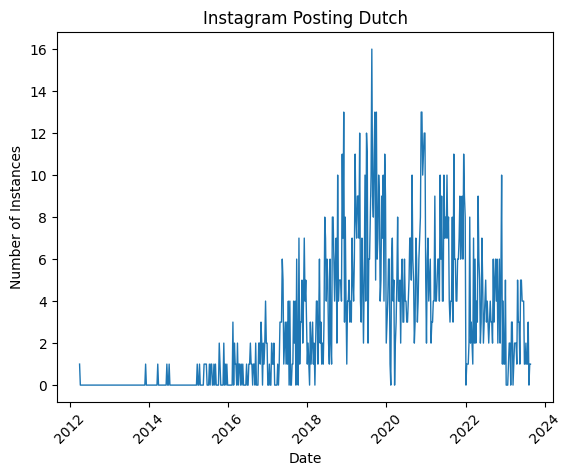

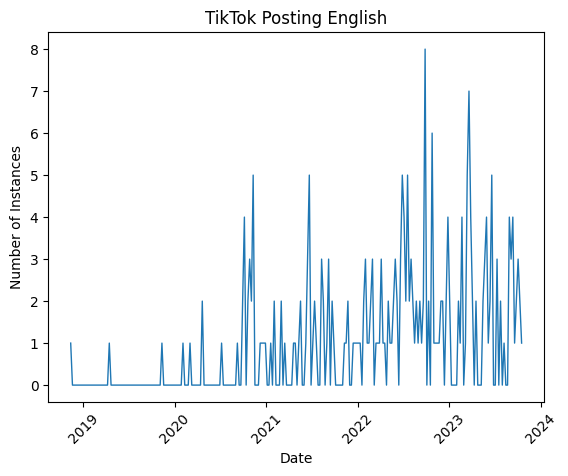

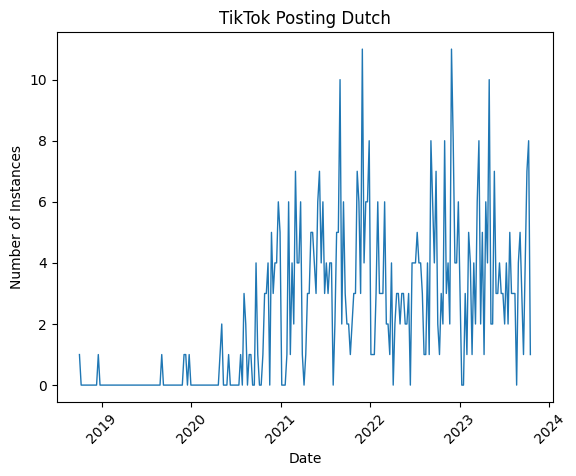

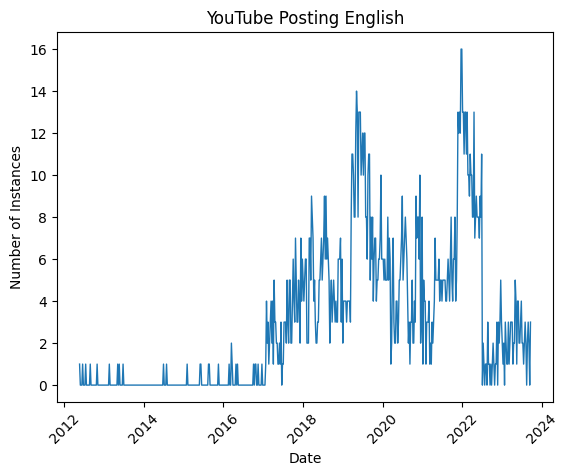

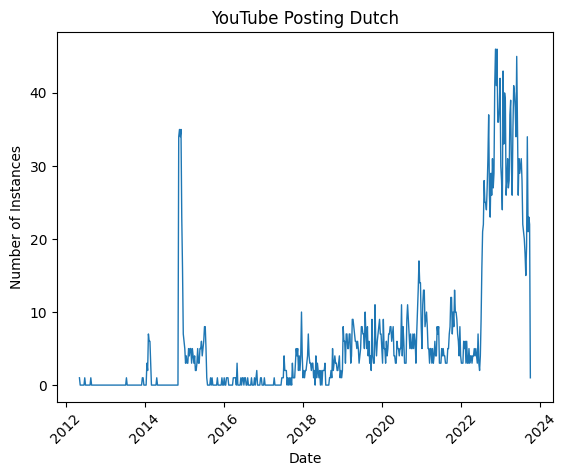

In [6]:
ic.plot_instances_by_week(dfins_en,"date", "Instagram Posting English")
ic.plot_instances_by_week(dfins_nl,"date", "Instagram Posting Dutch")
ic.plot_instances_by_week(dftt_en,"create_time", "TikTok Posting English")
ic.plot_instances_by_week(dftt_nl,"create_time", "TikTok Posting Dutch")
ic.plot_instances_by_week(dfyt_en,"published_at_video", "YouTube Posting English")
ic.plot_instances_by_week(dfyt_nl,"published_at_video", "YouTube Posting Dutch")

In [ ]:
ic.plot_instances_together(dfins_en,dftt_en,dfyt_en,"date","create_time","published_at_video","Instagram","TikTok","YouTube","Evolution of Posting per Week English")
ic.plot_instances_together(dfins_nl,dftt_nl,dfyt_nl,"date","create_time","published_at_video","Instagram","TikTok","YouTube","Evolution of Posting per Week Dutch")

In [ ]:
timediffins_en = ic.calculate_time_between_posts(dfins_en, "username", "date")
timediffins_nl = ic.calculate_time_between_posts(dfins_nl, "username", "date")
timedifftt_en = ic.calculate_time_between_posts(dftt_en, "username", "create_time")
timedifftt_nl = ic.calculate_time_between_posts(dftt_nl, "username", "create_time")
timediffyt_en = ic.calculate_time_between_posts(dfyt_en, "channel_title", "published_at_video")
timediffyt_nl = ic.calculate_time_between_posts(dfyt_nl, "channel_title", "published_at_video")

In [ ]:
ic.plot_time_between_posts(timediffyt_en, timedifftt_en, timediffins_en, "YouTube", "TikTok", "Instagram", "Time Between Posts English")
ic.plot_time_between_posts(timediffyt_nl, timedifftt_nl, timediffins_nl, "YouTube", "TikTok", "Instagram", "Time Between Posts Dutch")

In [ ]:
ic.draw_hashtag_network(dfins_en, "hastag", "English Instagram Hashtag Network")
ic.draw_hashtag_network(dfins_nl, "hastag", "Dutch Instagram Hashtag Network")
ic.draw_hashtag_network(dftt_en, "hastag", "English TikTok Hashtag Network")
ic.draw_hashtag_network(dftt_nl, "hastag", "Dutch TikTok Hashtag Network")
ic.draw_hashtag_network(dfyt_en, "hastag", "English YouTube Hashtag Network")
ic.draw_hashtag_network(dfyt_nl, "hastag", "Dutch YouTube Hashtag Network")

In [ ]:
ic.draw_tag_network(dfins_en, "tagged_user", "English Instagram Tag Network")
ic.draw_tag_network(dfins_nl, "tagged_user", "Dutch Instagram Tag Network")
ic.draw_tag_network(dftt_en, "tagged_user", "English TikTok Tag Network")
ic.draw_tag_network(dftt_nl, "tagged_user", "Dutch TikTok Tag Network")
ic.draw_tag_network(dfyt_en, "tagged_user", "English YouTube Tag Network")
ic.draw_tag_network(dfyt_nl, "tagged_user", "Dutch YouTube Tag Network")

In [ ]:
# English Instagram
infcharins_en = pd.DataFrame()
infcharins_en["username"] = dfins_en["username"].unique()
ic.calculate_post_count(dfins_en, infcharins_en, "username")
ic.calculate_avg_hashtag_per_post(dfins_en, infcharins_en, "username", "caption_hashtags")
ic.calculate_sd_hashtag_per_post(dfins_en, infcharins_en, "username", "caption_hashtags")
ic.calculate_avg_tag_per_post(dfins_en, infcharins_en, "username", "tagged_users")
ic.calculate_sd_tag_per_post(dfins_en, infcharins_en, "username", "tagged_users")
ic.calculate_avg_caption_length_per_user(dfins_en, infcharins_en, "username", "caption")
ic.calculate_sd_caption_length_per_user(dfins_en, infcharins_en, "username", "caption")

# Dutch Instagram
infcharins_nl = pd.DataFrame()
infcharins_nl["username"] = dfins_nl["username"].unique()
ic.calculate_post_count(dfins_nl, infcharins_nl, "username")
ic.calculate_avg_hashtag_per_post(dfins_nl, infcharins_nl, "username", "caption_hashtags")
ic.calculate_sd_hashtag_per_post(dfins_nl, infcharins_nl, "username", "caption_hashtags")
ic.calculate_avg_tag_per_post(dfins_nl, infcharins_nl, "username", "tagged_users")
ic.calculate_sd_tag_per_post(dfins_nl, infcharins_nl, "username", "tagged_users")
ic.calculate_avg_caption_length_per_user(dfins_nl, infcharins_nl, "username", "caption")
ic.calculate_sd_caption_length_per_user(dfins_nl, infcharins_nl, "username", "caption")

# English TikTok
infchartt_en = pd.DataFrame()
infchartt_en["username"] = dftt_en["username"].unique()
ic.calculate_post_count(dftt_en, infchartt_en, "username")
ic.calculate_avg_hashtag_per_post(dftt_en, infchartt_en, "username", "hashtag_names")
ic.calculate_sd_hashtag_per_post(dftt_en, infchartt_en, "username", "hashtag_names")
ic.calculate_avg_tag_per_post(dftt_en, infchartt_en, "username", "tagged_user")
ic.calculate_sd_tag_per_post(dftt_en, infchartt_en, "username", "tagged_user")
ic.calculate_avg_caption_length_per_user(dftt_en, infchartt_en, "username", "video_description")
ic.calculate_sd_caption_length_per_user(dftt_en, infchartt_en, "username", "video_description")

# Dutch TikTok
infchartt_nl = pd.DataFrame()
infchartt_nl["username"] = dftt_nl["username"].unique()
ic.calculate_post_count(dftt_nl, infchartt_nl, "username")
ic.calculate_avg_hashtag_per_post(dftt_nl, infchartt_nl, "username", "hashtag_names")
ic.calculate_sd_hashtag_per_post(dftt_nl, infchartt_nl, "username", "hashtag_names")
ic.calculate_avg_tag_per_post(dftt_nl, infchartt_nl, "username", "tagged_user")
ic.calculate_sd_tag_per_post(dftt_nl, infchartt_nl, "username", "tagged_user")
ic.calculate_avg_caption_length_per_user(dftt_nl, infchartt_nl, "username", "video_description")
ic.calculate_sd_caption_length_per_user(dftt_nl, infchartt_nl, "username", "video_description")

# English YouTube
infcharyt_en = pd.DataFrame()
infcharyt_en["username"] = dfyt_en["channel_title"].unique()
ic.calculate_post_count(dfyt_en, infcharyt_en, "channel_title")
ic.calculate_avg_hashtag_per_post(dfyt_en, infcharyt_en, "channel_title", "tags")
ic.calculate_sd_hashtag_per_post(dfyt_en, infcharyt_en, "channel_title", "tags")
ic.calculate_avg_tag_per_post(dfyt_en, infcharyt_en, "channel_title", "tagged_user")
ic.calculate_sd_tag_per_post(dfyt_en, infcharyt_en, "channel_title", "tagged_user")
ic.calculate_avg_caption_length_per_user(dfyt_en, infcharyt_en, "channel_title", "description_video")
ic.calculate_sd_caption_length_per_user(dfyt_en, infcharyt_en, "channel_title", "description_video")

# Dutch YouTube
infcharyt_nl = pd.DataFrame()
infcharyt_nl["username"] = dfyt_nl["channel_title"].unique()
ic.calculate_post_count(dfyt_nl, infcharyt_nl, "channel_title")
ic.calculate_avg_hashtag_per_post(dfyt_nl, infcharyt_nl, "channel_title", "tags")
ic.calculate_sd_hashtag_per_post(dfyt_nl, infcharyt_nl, "channel_title", "tags")
ic.calculate_avg_tag_per_post(dfyt_nl, infcharyt_nl, "channel_title", "tagged_user")
ic.calculate_sd_tag_per_post(dfyt_nl, infcharyt_nl, "channel_title", "tagged_user")
ic.calculate_avg_caption_length_per_user(dfyt_nl, infcharyt_nl, "channel_title", "description_video")
ic.calculate_sd_caption_length_per_user(dfyt_nl, infcharyt_nl, "channel_title", "description_video")